In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [4]:
print(tf.__version__)

1.12.0


In [13]:
fashion_mnist=keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

In [14]:
class_names=['T-shirt/top', 'Trouser', "Pullover", 'Dress', 'Coat', 'Sandal',
             'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
len(train_images)

60000

In [17]:
len(test_images)

10000

In [18]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
test_images.shape


(10000, 28, 28)

In [21]:
len(test_images)

10000

In [23]:
len(test_labels)


10000

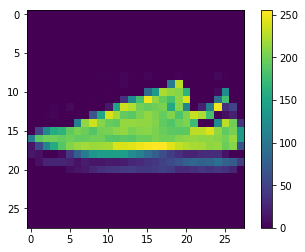

In [26]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
# normalising the images
train_images=train_images/255.0
test_images=test_images/255.0

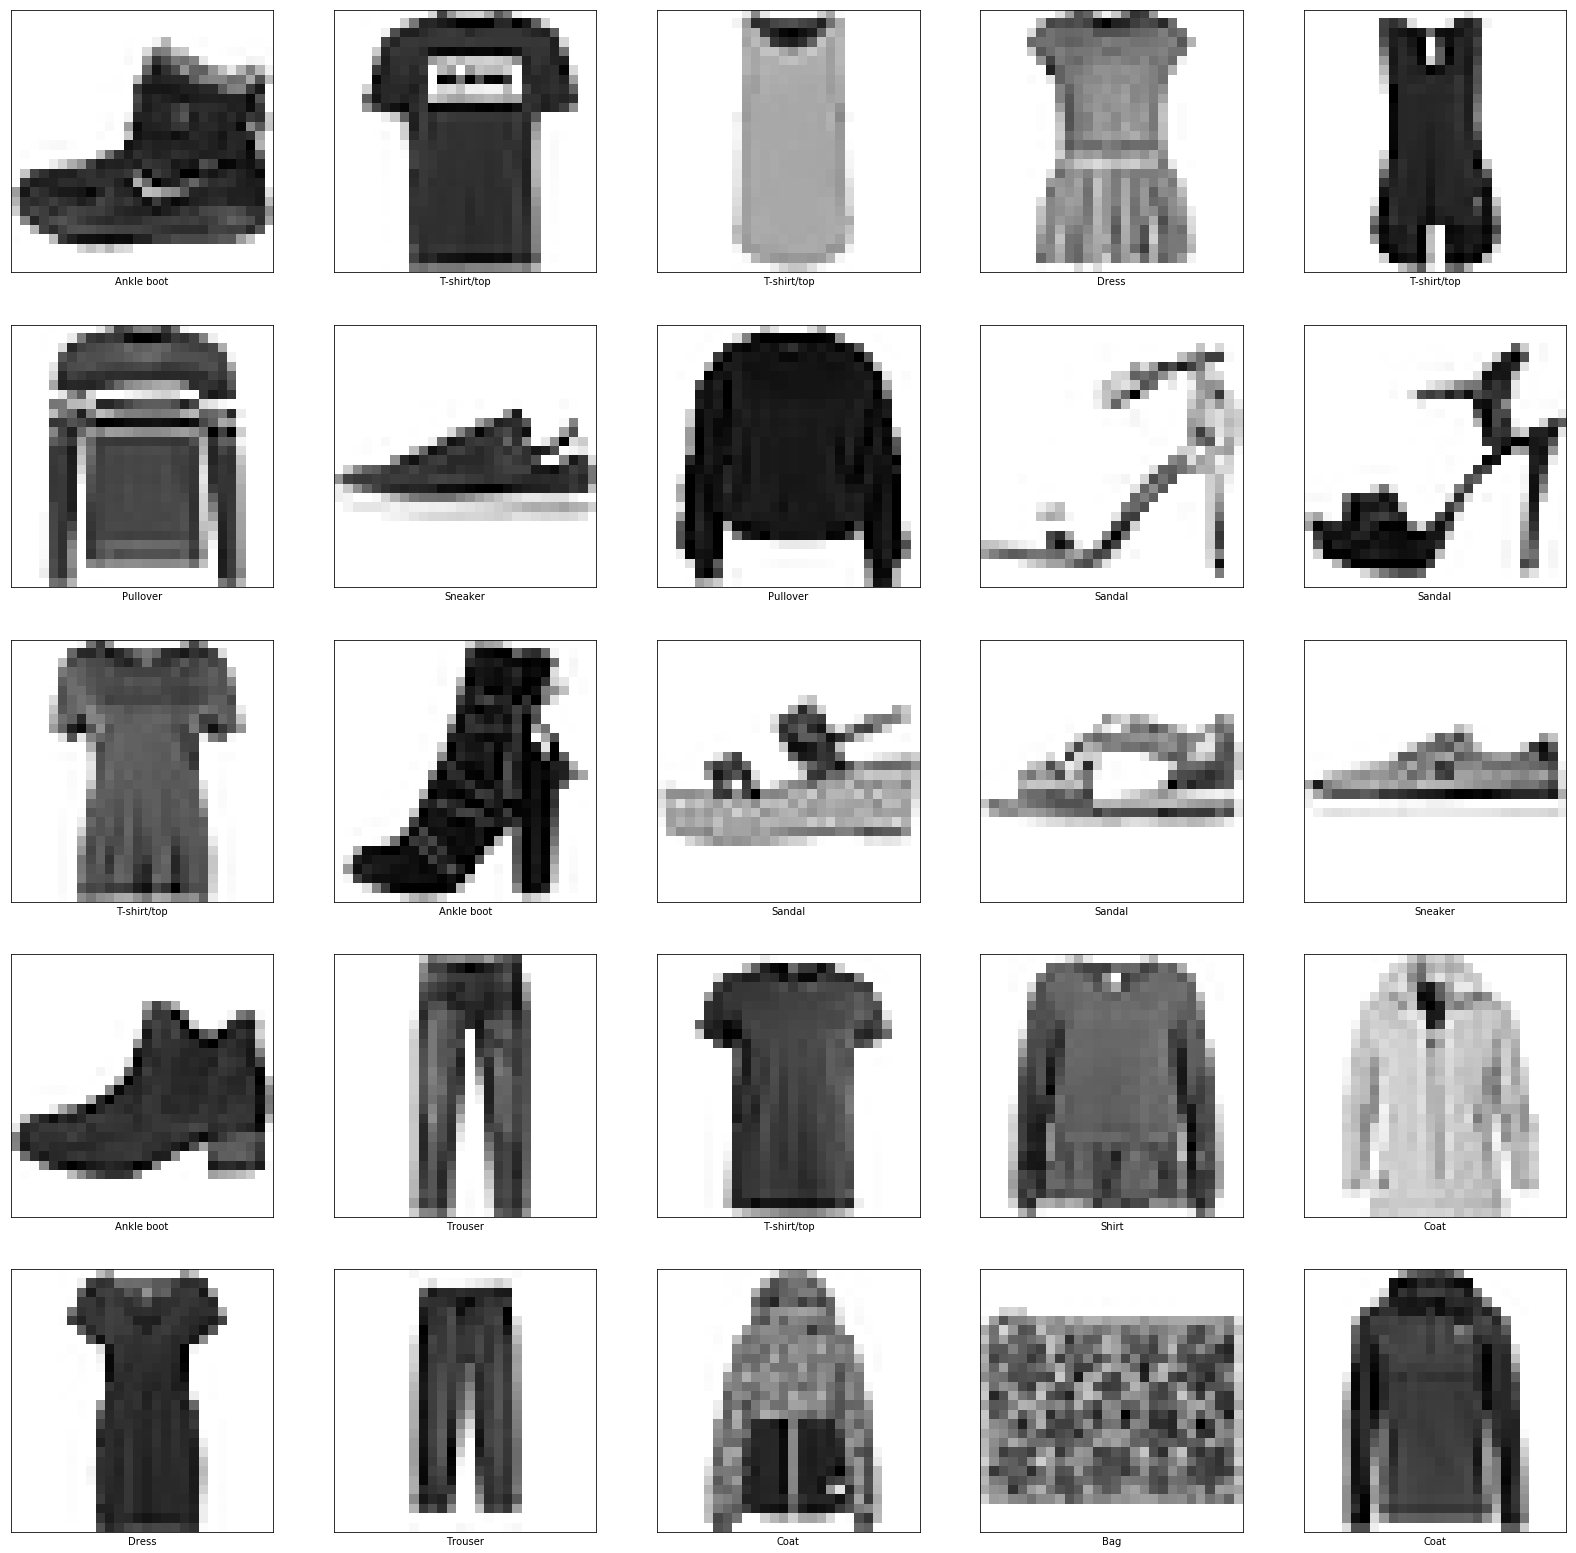

In [32]:
plt.figure(figsize=(28,28))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    
    

In [33]:
#building the model

model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128, activation=tf.nn.relu),
                        keras.layers.Dense(10, activation=tf.nn.softmax)
                       ])



In [34]:
#compiling the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])



In [36]:
#training the model

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 186us/step - loss: 0.5021 - acc: 0.8260
Epoch 2/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.3751 - acc: 0.8664
Epoch 3/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.3341 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.3116 - acc: 0.8861
Epoch 5/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.2944 - acc: 0.8911


In [37]:
#evaluating accuracy for the testing model

test_loss, test_acc=model.evaluate(test_images, test_labels)
print('Test Accuracy', test_acc)

10000/10000 [==============================] - 1s 70us/step
Test Accuracy 0.8684


In [38]:
#prediction os some images

predictions=model.predict(test_images)

In [39]:
predictions[555]

array([2.3160733e-06, 9.9997807e-01, 5.8562538e-08, 1.8032961e-05,
       1.5484327e-06, 1.2682709e-08, 1.8166379e-08, 2.5905755e-12,
       2.6586477e-09, 3.7163651e-13], dtype=float32)